# 01 — Executive EDA (theLook)

This notebook loads the Step 2 query outputs and summarizes:
- Top Categories (revenue + margin proxy)
- Fulfillment performance (delivery time)
- Revenue by Traffic Source

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

ROOT = Path.cwd()
while not (ROOT / "analysis").exists() and ROOT != ROOT.parent:
    ROOT = ROOT.parent

OUT_DIR = ROOT / "analysis" / "outputs"
OUT_DIR

WindowsPath('c:/dev/ecommerceproject/analysis/outputs')

# 02 Load the three data sets

In [2]:
top_categories = pd.read_csv(OUT_DIR / "top_categories.csv")
fulfillment = pd.read_csv(OUT_DIR / "fulfillment.csv")
traffic_source_revenue = pd.read_csv(OUT_DIR / "traffic_source_revenue.csv")

print("top_categories:", top_categories.shape)
print("fulfillment:", fulfillment.shape)
print("traffic_source_revenue:", traffic_source_revenue.shape)

top_categories: (15, 4)
fulfillment: (1, 3)
traffic_source_revenue: (5, 4)


# 03 — Quick preview (sanity check)

In [3]:
display(top_categories.head(10))
display(fulfillment)
display(traffic_source_revenue.head(10))


,category,revenue,margin_proxy,margin_rate_proxy
0,Outerwear & Coats,703060.06,389765.73443,0.5544
1,Jeans,661044.69,307722.50750,0.4655
2,Sweaters,450696.52,233788.54696,0.5187
3,Suits & Sport Coats,356550.34,213447.70171,0.5986
4,Fashion Hoodies & Sweatshirts,345100.97,165737.65798,0.4803
5,Swim,338041.08,165333.36855,0.4891
6,Sleep & Lounge,283189.81,145960.54064,0.5154
7,Shorts,267013.51,133333.73028,0.4994
8,Tops & Tees,259482.62,114237.45704,0.4403
9,Dresses,250040.71,137272.00595,0.5490


,p50_days_to_deliver,p90_days_to_deliver,avg_days_to_deliver
0,3.0,6.0,2.968093


,user_traffic_source,revenue,orders,aov
0,Search,7597242.58,87768,86.56
1,Organic,1637469.72,18963,86.35
2,Facebook,627375.91,7242,86.63
3,Email,528455.79,6166,85.70
4,Display,436574.90,5087,85.82


# 04 Data types + missing values (fast EDA)

In [4]:
def profile_df(df, name):
    print(f"=== {name} ===")
    display(df.dtypes.to_frame("dtype").T)
    na = df.isna().sum().to_frame("missing_count").T
    display(na)
    display(df.describe(include="all").T)

profile_df(top_categories, "top_categories")
profile_df(traffic_source_revenue, "traffic_source_revenue")


=== top_categories ===


,category,revenue,margin_proxy,margin_rate_proxy
dtype,object,float64,float64,float64


,category,revenue,margin_proxy,margin_rate_proxy
missing_count,0,0,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,15,15,Outerwear & Coats,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,15.0,NaN,NaN,NaN,333786.035333,157931.402511,156480.03,245223.82,267013.51,350825.655,703060.06
margin_proxy,15.0,NaN,NaN,NaN,174313.190975,81000.037653,97403.77299,126767.893515,141119.87683,189592.679845,389765.73443
margin_rate_proxy,15.0,NaN,NaN,NaN,0.528173,0.055471,0.4403,0.4847,0.5187,0.568,0.6225


=== traffic_source_revenue ===


,user_traffic_source,revenue,orders,aov
dtype,object,float64,int64,float64


,user_traffic_source,revenue,orders,aov
missing_count,0,0,0,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_traffic_source,5,5,Search,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,5.0,NaN,NaN,NaN,2165423.78,3074799.378255,436574.9,528455.79,627375.91,1637469.72,7597242.58
orders,5.0,NaN,NaN,NaN,25045.2,35506.515834,5087.0,6166.0,7242.0,18963.0,87768.0
aov,5.0,NaN,NaN,NaN,86.212,0.427399,85.7,85.82,86.35,86.56,86.63


# 05 Chart 1: Top categories by revenue

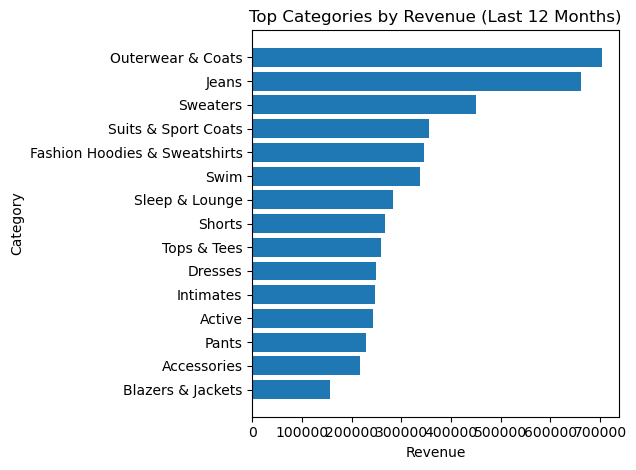

In [5]:
df = top_categories.copy().sort_values("revenue", ascending=True)

plt.figure()
plt.barh(df["category"], df["revenue"])
plt.title("Top Categories by Revenue (Last 12 Months)")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


# 06 Chart 2: Margin rate proxy by category (shows efficiency)

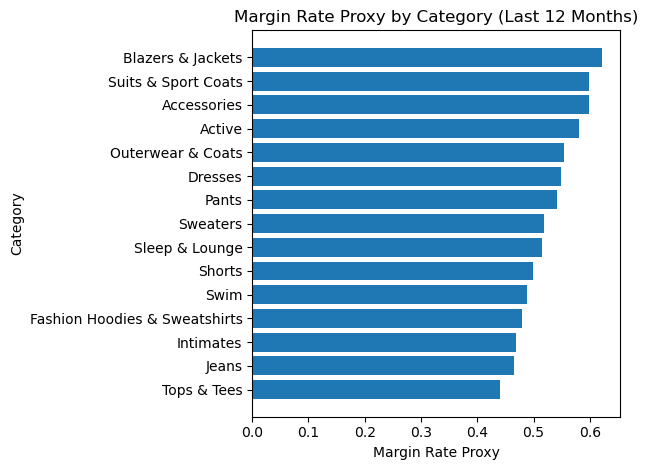

In [6]:
df = top_categories.copy().sort_values("margin_rate_proxy", ascending=True)

plt.figure()
plt.barh(df["category"], df["margin_rate_proxy"])
plt.title("Margin Rate Proxy by Category (Last 12 Months)")
plt.xlabel("Margin Rate Proxy")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


# 07 Chart 3: Revenue by traffic source

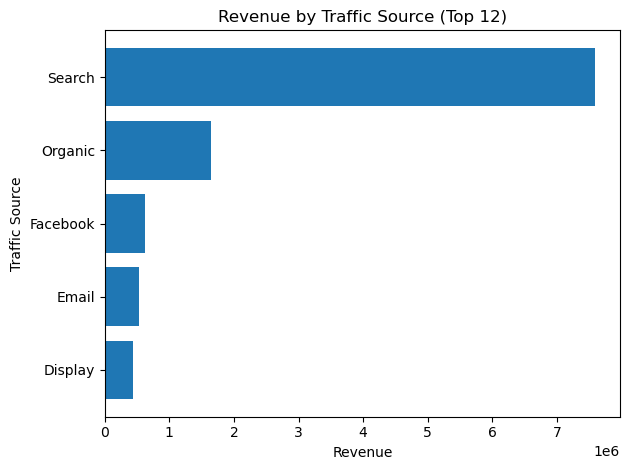

In [7]:
df = traffic_source_revenue.copy().sort_values("revenue", ascending=False).head(12)
df = df.sort_values("revenue", ascending=True)

plt.figure()
plt.barh(df["user_traffic_source"], df["revenue"])
plt.title("Revenue by Traffic Source (Top 12)")
plt.xlabel("Revenue")
plt.ylabel("Traffic Source")
plt.tight_layout()
plt.show()


# 08 Add “Insights” (auto-generated bullets from the data)

In [8]:
# --- Top categories insights ---
top_cat = top_categories.sort_values("revenue", ascending=False).reset_index(drop=True)
total_rev_top15 = top_cat["revenue"].sum()
top1 = top_cat.iloc[0]
top3_share = top_cat.head(3)["revenue"].sum() / total_rev_top15

# --- Traffic source insights ---
ts = traffic_source_revenue.sort_values("revenue", ascending=False).reset_index(drop=True)
ts_total = ts["revenue"].sum()
ts1 = ts.iloc[0]
ts_top3_share = ts.head(3)["revenue"].sum() / ts_total

# --- Fulfillment insights ---
f = fulfillment.iloc[0].to_dict()

insights = [
    f"Category concentration: Top category is '{top1['category']}' with revenue {top1['revenue']:,.2f}. Top 3 categories represent {top3_share:.1%} of revenue within the Top 15 categories list.",
    f"Profit efficiency: Highest margin_rate_proxy in Top 15 is '{top_cat.loc[top_cat['margin_rate_proxy'].idxmax(),'category']}' at {top_cat['margin_rate_proxy'].max():.2%}. Lowest is '{top_cat.loc[top_cat['margin_rate_proxy'].idxmin(),'category']}' at {top_cat['margin_rate_proxy'].min():.2%}.",
    f"Acquisition impact: Top traffic source is '{ts1['user_traffic_source']}' with revenue {ts1['revenue']:,.2f} and AOV {ts1['aov']:,.2f}. Top 3 sources represent {ts_top3_share:.1%} of total revenue.",
    f"Fulfillment performance: median (p50) delivery time ≈ {float(f['p50_days_to_deliver']):.2f} days, p90 ≈ {float(f['p90_days_to_deliver']):.2f} days, average ≈ {float(f['avg_days_to_deliver']):.2f} days."
]

for i, line in enumerate(insights, 1):
    print(f"{i}. {line}")


1. Category concentration: Top category is 'Outerwear & Coats' with revenue 703,060.06. Top 3 categories represent 36.2% of revenue within the Top 15 categories list.
2. Profit efficiency: Highest margin_rate_proxy in Top 15 is 'Blazers & Jackets' at 62.25%. Lowest is 'Tops & Tees' at 44.03%.
3. Acquisition impact: Top traffic source is 'Search' with revenue 7,597,242.58 and AOV 86.56. Top 3 sources represent 91.1% of total revenue.
4. Fulfillment performance: median (p50) delivery time ≈ 3.00 days, p90 ≈ 6.00 days, average ≈ 2.97 days.


# 09 “Next questions”

In [9]:
next_questions = [
    "Which products (not just categories) drive the top revenue and how does their margin proxy compare?",
    "Do any traffic sources have high revenue but low AOV (or vice versa), suggesting different acquisition quality?",
    "Is slower fulfillment correlated with higher returns? (requires returns model / delivered vs returned analysis)",
    "How does revenue and margin evolve over time (monthly trend) by category and traffic source?"
]

for i, q in enumerate(next_questions, 1):
    print(f"{i}. {q}")


1. Which products (not just categories) drive the top revenue and how does their margin proxy compare?
2. Do any traffic sources have high revenue but low AOV (or vice versa), suggesting different acquisition quality?
3. Is slower fulfillment correlated with higher returns? (requires returns model / delivered vs returned analysis)
4. How does revenue and margin evolve over time (monthly trend) by category and traffic source?
